In [1]:
RESULT_DIR = '/media/ponbac/BigHDD/ethereum'

In [2]:
import os
import pandas as pd

POISON_DIR = f'{RESULT_DIR}/blacklist/poison'

FLAGGED_RESULT = f'{POISON_DIR}/poison-flagged-result.csv'
FLAGGED_RUNDATA = f'{POISON_DIR}/poison-flagged-rundata.csv'
poison_flagged_rundata = pd.read_csv(FLAGGED_RUNDATA, dtype={'chunk': int})
poison_flagged_rundata['algorithm'] = 'Poison (Flagged)'

TORNADO_RESULT = f'{POISON_DIR}/poison-tornado-result.csv'
TORNADO_RUNDATA = f'{POISON_DIR}/poison-tornado-rundata.csv'
poison_tornado_rundata = pd.read_csv(TORNADO_RUNDATA, dtype={'chunk': int})
poison_tornado_rundata['algorithm'] = 'Poison (Tornado)'

In [3]:
HAIRCUT_DIR = f'{RESULT_DIR}/blacklist/haircut'

FLAGGED_RESULT = f'{HAIRCUT_DIR}/haircut-flagged-result.csv'
FLAGGED_RUNDATA = f'{HAIRCUT_DIR}/haircut-flagged-rundata.csv'
haircut_flagged_rundata = pd.read_csv(FLAGGED_RUNDATA)
haircut_flagged_rundata['algorithm'] = 'Haircut (Flagged)'

TORNADO_RESULT = f'{HAIRCUT_DIR}/haircut-tornado-result.csv'
TORNADO_RUNDATA = f'{HAIRCUT_DIR}/haircut-tornado-rundata.csv'
haircut_tornado_rundata = pd.read_csv(TORNADO_RUNDATA)
haircut_tornado_rundata['algorithm'] = 'Haircut (Tornado)'

In [4]:
SENIORITY_DIR = f'{RESULT_DIR}/blacklist/seniority'

FLAGGED_RESULT = f'{SENIORITY_DIR}/seniority-flagged-result.csv'
FLAGGED_RUNDATA = f'{SENIORITY_DIR}/seniority-flagged-rundata.csv'
seniority_flagged_rundata = pd.read_csv(FLAGGED_RUNDATA)
seniority_flagged_rundata['algorithm'] = 'Seniority (Flagged)'

TORNADO_RESULT = f'{SENIORITY_DIR}/seniority-tornado-result.csv'
TORNADO_RUNDATA = f'{SENIORITY_DIR}/seniority-tornado-rundata.csv'
seniority_tornado_rundata = pd.read_csv(TORNADO_RUNDATA)
seniority_tornado_rundata['algorithm'] = 'Seniority (Tornado)'

[Text(0.5, 1.0, 'Addresses blacklisted over time'),
 Text(0.5, 0, 'Block number'),
 Text(0, 0.5, '# of addresses blacklisted')]

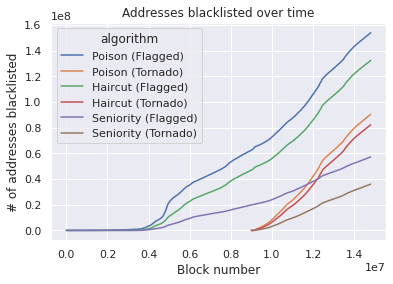

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

# Combine rundata
rundata = pd.concat([poison_flagged_rundata, poison_tornado_rundata])
rundata = pd.concat([rundata, haircut_flagged_rundata])
rundata = pd.concat([rundata, haircut_tornado_rundata])
rundata = pd.concat([rundata, seniority_flagged_rundata])
rundata = pd.concat([rundata, seniority_tornado_rundata])
rundata = rundata.reset_index(drop=True)

# Create a visualization
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (14.7, 8.27)})
sns.lineplot(x='max_block', y='n_blacklisted', hue='algorithm',
             data=rundata).set(title='Addresses blacklisted over time', xlabel='Block number', ylabel='# of addresses blacklisted')

[Text(0.5, 1.0, 'RAM usage over time'),
 Text(0.5, 0, 'Block number'),
 Text(0, 0.5, 'RAM used (GB)')]

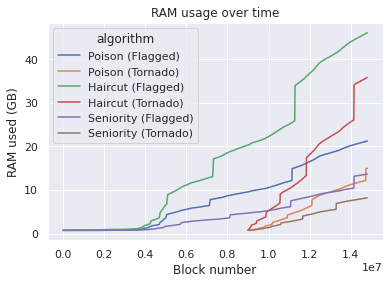

In [6]:
sns.lineplot(x='max_block', y='ram_usage_gb', hue='algorithm',
             data=rundata).set(title='RAM usage over time', xlabel='Block number', ylabel='RAM used (GB)')

[Text(0.5, 1.0, 'Time to reach block'),
 Text(0.5, 0, 'Block number'),
 Text(0, 0.5, 'Processed after (hours)')]

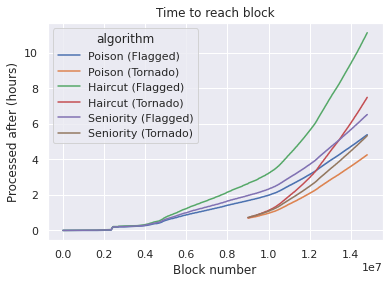

In [7]:
rundata.processed_after = rundata.processed_after.apply(lambda x: (int(x.split(' ')[2].split(':')[0]) * 60 + int(x.split(' ')[2].split(':')[1])) / 60)
sns.lineplot(x='max_block', y='processed_after', hue='algorithm', data=rundata).set(title='Time to reach block', xlabel='Block number', ylabel='Processed after (hours)')

In [8]:
# Join rundata on chunk
joined_df = pd.merge(poison_flagged_rundata, poison_tornado_rundata, on='chunk', suffixes=('_flagged', '_tornado'), how='outer')
joined_df


,chunk,rows_processed_flagged,n_blacklisted_flagged,max_block_flagged,processed_after_flagged,ram_usage_gb_flagged,algorithm_flagged,rows_processed_tornado,n_blacklisted_tornado,max_block_tornado,processed_after_tornado,ram_usage_gb_tornado,algorithm_tornado
0,1,10000,0,853.0,0 days 00:00:00.086819,0.73,Poison (Flagged),10000.0,0.0,9000025.0,0 days 00:42:01.978209,0.74,Poison (Tornado)
1,1000,10000000,65446,1662245.0,0 days 00:00:45.679287,0.74,Poison (Flagged),10000000.0,0.0,9032059.0,0 days 00:42:26.906528,0.74,Poison (Tornado)
2,2000,20000000,316561,2322303.0,0 days 00:01:41.956776,0.77,Poison (Flagged),20000000.0,0.0,9068329.0,0 days 00:42:52.346021,0.74,Poison (Tornado)
3,3000,30000000,329228,2357916.0,0 days 00:02:02.854154,0.77,Poison (Flagged),30000000.0,0.0,9103743.0,0 days 00:43:17.933776,0.74,Poison (Tornado)
4,4000,40000000,329527,NaN,0 days 00:02:20.181384,0.77,Poison (Flagged),40000000.0,101577.0,9134567.0,0 days 00:43:45.334045,0.76,Poison (Tornado)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,502000,5020000000,153215342,14753587.0,0 days 05:21:02.494116,21.19,Poison (Flagged),NaN,NaN,NaN,NaN,NaN,NaN
503,503000,5030000000,153383445,14764731.0,0 days 05:21:37.036714,21.21,Poison (Flagged),NaN,NaN,NaN,NaN,NaN,NaN
504,504000,5040000000,153551265,14776713.0,0 days 05:22:16.628624,21.22,Poison (Flagged),NaN,NaN,NaN,NaN,NaN,NaN
505,505000,5050000000,153707361,14788738.0,0 days 05:22:55.111497,21.24,Poison (Flagged),NaN,NaN,NaN,NaN,NaN,NaN
